In [2]:
import matplotlib.pyplot as plt
from IPython import display
from IPython.display import clear_output
from brain.DuelingDQN import DuelingDQN
from utils import *
import gym
import time
import pandas
import numpy as np
import ipdb
import pickle
from tqdm import tqdm
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
%matplotlib inline

In [ ]:
MEMORY_SIZE = 3000
ACTION_SPACE = 2

In [3]:
env = gym.make('CartPole-v0')
env.seed(1)     # reproducible, general Policy gradient has high variance
agent = DuelingDQN(n_actions=ACTION_SPACE, 
                   n_features=3, 
                   memory_size=MEMORY_SIZE,
                   e_greedy_increment=0.001,
                   dueling=True, 
                   output_graph=True)

In [4]:
final_rewards = []
for i_episode in tqdm(range(1000)):
    observation = env.reset()
    rewards = []
    for t in range(200):
        action = agent.choose_action(observation)

        observation_, reward, done, info = env.step(action)
        rewards.append(reward)

        agent.store_transition(observation, action, reward)

        if done:
            vt = agent.learn()
            break

        observation = observation_
    final_rewards.append(np.sum(rewards))

100%|██████████| 1000/1000 [03:41<00:00,  4.52it/s]


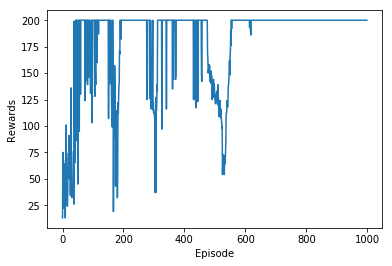

In [5]:
x = np.arange(len(final_rewards))
plt.plot(x, final_rewards)
plt.xlabel('Episode')
plt.ylabel('Rewards')
plt.savefig('./image/MTPG-cartpole.png')